## I. Introduction to the Problem and Dataset

In [42]:
print("Hello World!")

Hello World!


## II. Description of the dataset

## III. List of requirements

In [43]:
# grab the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset from Dataset folder
og_df = pd.read_csv('Dataset 2 - Garments Dataset/garments.csv')
df = pd.read_csv('Dataset 2 - Garments Dataset/garments.csv')

## IV. Data Preprocessing and Cleaning


In [44]:
# check for NaN values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [45]:
# change all the NaN values to 0
df = df.fillna(0)

In [46]:
# check department column
print(df['department'].unique())

# change all 'finishing ' to 'finishing'
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'] = df['department'].replace('sweing', 'sewing')
print(df['department'].unique())

['sweing' 'finishing ' 'finishing']
['sewing' 'finishing']


In [47]:
#check datatypes for all columns
print(df.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [48]:
print(df['department'].value_counts())

department
sewing       691
finishing    506
Name: count, dtype: int64


In [49]:
print(df['quarter'].value_counts())

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


In [50]:
print(df['day'].value_counts())

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


In [51]:
print(df['team'].value_counts())

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64


In [52]:
print(df['targeted_productivity'].value_counts())

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64


In [53]:
print(df['smv'].value_counts())

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64


In [54]:
print(df['wip'].value_counts())

wip
0.0       506
1039.0      5
1282.0      4
1422.0      3
1216.0      3
         ... 
1635.0      1
1519.0      1
1337.0      1
1118.0      1
914.0       1
Name: count, Length: 549, dtype: int64


In [55]:
# get all rows with 0 wip
print(df[df['wip'] == 0])

           date   quarter department        day  team  targeted_productivity  \
1      1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
6      1/1/2015  Quarter1  finishing   Thursday     2                   0.75   
13     1/1/2015  Quarter1  finishing   Thursday    10                   0.65   
14     1/1/2015  Quarter1  finishing   Thursday     8                   0.75   
15     1/1/2015  Quarter1  finishing   Thursday     4                   0.75   
...         ...       ...        ...        ...   ...                    ...   
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

       smv  wip  over_time  incentive  

In [56]:
print(df['over_time'].value_counts())

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64


In [57]:
# print incentives with less than 0 
print(df[df['incentive'] < 0])

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [58]:
print(df['idle_time'].value_counts())

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64


In [59]:
print(df['idle_men'].value_counts())

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64


In [60]:
print(df['no_of_style_change'].value_counts())

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64


In [61]:
print(df['no_of_workers'].head())
# round down the no_of_workers
df['no_of_workers'] = np.floor(df['no_of_workers'])
print(df['no_of_workers'].head())

0    59.0
1     8.0
2    30.5
3    30.5
4    56.0
Name: no_of_workers, dtype: float64
0    59.0
1     8.0
2    30.0
3    30.0
4    56.0
Name: no_of_workers, dtype: float64


In [62]:
print(df['actual_productivity'].value_counts())
# print actual_productivity where it is < 0 or > 1
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64
          date   quarter department        day  team  targeted_productivity  \
337  1/20/2015  Quarter3  finishing    Tuesday     5                   0.70   
437  1/26/2015  Quarter4  finishing     Monday     3                   0.75   
456  1/27/2015  Quarter4     sewing    Tuesday     2                   0.75   
457  1/27/2015  Quarter4     sewing    Tuesday     3                   0.75   
477  1/28/2015  Quarter4     sewing  Wednesday     2                   0.80   
478  1/28/2015  Quarter4     sewing  Wednesday     3                   0.80   
498  1/29/2015  Quarter5     sewing   Thursday     2                   0.80   
518  1/31/2015  Quarter5     sewing   Saturday     3                   0.80   
519  1/31/2015  Quarter5     sewing   Saturday     2             

In [63]:
# round down the actual_productivity if it is > 1
df['actual_productivity'] = np.where(df['actual_productivity'] > 1, 1, df['actual_productivity'])
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [64]:
#drop date
df = df.drop('date', axis=1)

In [65]:
# check for duplicates
print(df.duplicated().sum())

0


In [66]:
#check if any numerical value is less than 0
print(df[(df.select_dtypes(include=[np.number]) < 0).any(axis=1)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [67]:
# print all datatypes
print(df.dtypes)

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [68]:
# calculate overtime per worker
df['overtime_per_worker'] = df['over_time'] / df['no_of_workers']
print(df[df['overtime_per_worker'] > 120].shape)
print(df[df['overtime_per_worker'] > 240].shape)
print(df[df['overtime_per_worker'] > 420].shape)
print(df[df['overtime_per_worker'] > 600].shape)

(490, 15)
(70, 15)
(16, 15)
(2, 15)


In [69]:
# print all idle_men with decimal values
print(df[df['idle_men'] % 1 != 0])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


In [70]:
#print all rows with idle time = 0 and idle_men > 0
print(df[(df['idle_time'] == 0) & (df['idle_men'] > 0)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


In [71]:
# turn department, day, and quarter into one-hot encoding
df = pd.get_dummies(df, columns=['department', 'day', 'quarter'])
# print all datatypes
print(df.dtypes)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
overtime_per_worker      float64
department_finishing        bool
department_sewing           bool
day_Monday                  bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
quarter_Quarter1            bool
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
dtype: object


In [72]:
#check for days where there are no incentives but have overtime (trim to targeted_productivity, idle_men, idle_time, and actual_productivity)
print(df[(df['incentive'] == 0) & (df['over_time'] > 0)][['targeted_productivity', 'idle_men', 'idle_time', 'actual_productivity', 'incentive', 'over_time', 'wip', 'smv']])

# TODO SOMETHING HERE

      targeted_productivity  idle_men  idle_time  actual_productivity  \
1                      0.75         0        0.0             0.886500   
6                      0.75         0        0.0             0.755167   
13                     0.65         0        0.0             0.705917   
14                     0.75         0        0.0             0.676667   
15                     0.75         0        0.0             0.593056   
...                     ...       ...        ...                  ...   
1192                   0.75         0        0.0             0.628333   
1193                   0.70         0        0.0             0.625625   
1194                   0.65         0        0.0             0.625625   
1195                   0.75         0        0.0             0.505889   
1196                   0.70         0        0.0             0.394722   

      incentive  over_time  wip   smv  
1             0        960  0.0  3.94  
6             0        960  0.0  3.94  
13 

In [73]:
#check overtime and incentive relationship
print(df[(df['incentive'] > 0) & (df['over_time'] > 0)][['targeted_productivity', 'idle_men', 'idle_time', 'actual_productivity', 'incentive', 'over_time', 'wip', 'smv']])

      targeted_productivity  idle_men  idle_time  actual_productivity  \
0                      0.80         0        0.0             0.940725   
2                      0.80         0        0.0             0.800570   
3                      0.80         0        0.0             0.800570   
4                      0.80         0        0.0             0.800382   
5                      0.80         0        0.0             0.800125   
...                     ...       ...        ...                  ...   
1187                   0.75         0        0.0             0.750051   
1188                   0.70         0        0.0             0.700557   
1189                   0.70         0        0.0             0.700505   
1190                   0.70         0        0.0             0.700246   
1191                   0.65         0        0.0             0.650596   

      incentive  over_time     wip    smv  
0            98       7080  1108.0  26.16  
2            50       3660   968.0 

In [74]:
#check cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  overtime_per_worker    1197 non-null   float64
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  day_Monday             1197 non-null   bool   
 15  day_

# V. Exploratory Data Analysis

In [34]:
print("EDA")

EDA


## V-A. EDA 1 (Seal)

## V-B. EDA 2 (Orrin)

## V-C. Day of the Week and Quarter of the Month to Actual Productivity (Tean)

Seclude the relevant fields for the EDA

In [41]:
day_quarter_productivity_df = df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'actual_productivity']]

day_quarter_productivity_df

,day_Monday,day_Tuesday,day_Wednesday,day_Thursday,day_Saturday,day_Sunday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,actual_productivity
0,False,False,False,True,False,False,True,False,False,False,False,0.940725
1,False,False,False,True,False,False,True,False,False,False,False,0.886500
2,False,False,False,True,False,False,True,False,False,False,False,0.800570
3,False,False,False,True,False,False,True,False,False,False,False,0.800570
4,False,False,False,True,False,False,True,False,False,False,False,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,True,False,False,False,False,True,False,False,False,0.628333
1193,False,False,True,False,False,False,False,True,False,False,False,0.625625
1194,False,False,True,False,False,False,False,True,False,False,False,0.625625
1195,False,False,True,False,False,False,False,True,False,False,False,0.505889


In [75]:
# Ensure we are working with a copy of the DataFrame
day_quarter_productivity_df = day_quarter_productivity_df.copy()

# Make day_of_week and quarter columns
day_quarter_productivity_df.loc[:, 'day_of_week'] = day_quarter_productivity_df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday']].idxmax(axis=1).str.split('_').str[1]
day_quarter_productivity_df.loc[:, 'quarter'] = day_quarter_productivity_df[['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']].idxmax(axis=1).str.split('_').str[1]

In [76]:
# Drop the one-hot encoded columns
day_quarter_productivity_df = day_quarter_productivity_df.drop(['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5'], axis=1)

In [77]:
day_quarter_productivity_df

,actual_productivity,day_of_week,quarter
0,0.940725,Thursday,Quarter1
1,0.886500,Thursday,Quarter1
2,0.800570,Thursday,Quarter1
3,0.800570,Thursday,Quarter1
4,0.800382,Thursday,Quarter1
...,...,...,...
1192,0.628333,Wednesday,Quarter2
1193,0.625625,Wednesday,Quarter2
1194,0.625625,Wednesday,Quarter2
1195,0.505889,Wednesday,Quarter2


In [78]:
pivot_table = day_quarter_productivity_df.pivot_table(
    values='actual_productivity', 
    index='quarter', 
    columns='day_of_week', 
    aggfunc='mean'
)

# Sort the days of the week
pivot_table = pivot_table[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday']]

pivot_table

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Saturday
quarter,,,,,,
Quarter1,0.744070,0.746133,0.751094,0.755135,0.749143,0.761843
Quarter2,0.748086,0.739473,0.760480,0.738996,0.719283,0.741212
Quarter3,0.677855,0.706273,0.700208,0.695238,0.722660,0.730730
Quarter4,0.716707,0.737127,0.737412,0.712093,0.654613,0.700899
Quarter5,NaN,NaN,NaN,NaN,0.791633,0.854926


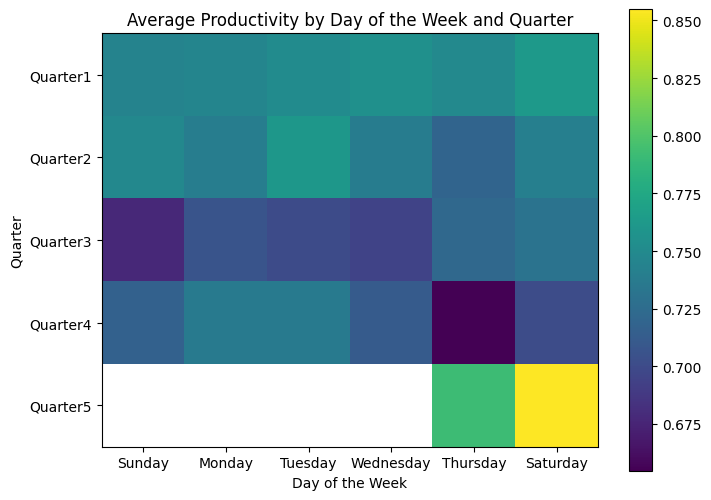

In [79]:
# Plot the pivot table
plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(6), pivot_table.columns)
plt.yticks(np.arange(5), pivot_table.index)
plt.xlabel('Day of the Week')
plt.ylabel('Quarter')
plt.title('Average Productivity by Day of the Week and Quarter')
plt.show()

## V-D. Team and SMV(Tan Ai)

In [98]:
TSMV_df = df[['over_time', 'overtime_per_worker']]

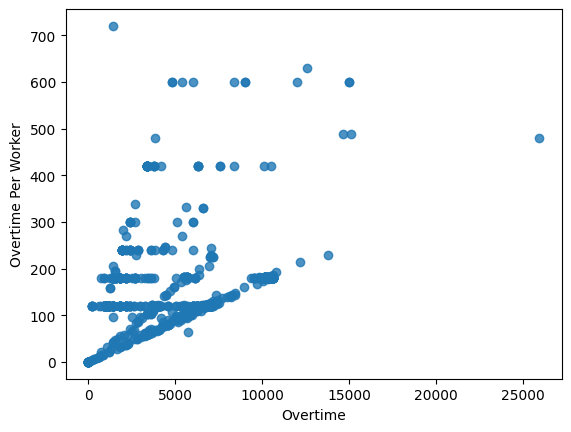

In [100]:
TSMV_df = TSMV_df.copy()

x = TSMV_df['over_time']
y = TSMV_df['overtime_per_worker']
plt.scatter(x, y, alpha=0.8)
plt.xlabel('Overtime')
plt.ylabel('Overtime Per Worker')
plt.show()

# VI. Initial Model Training

## VI-0. Train, Validation, and Test Set Separation

## VI-A. Linear Regression

## VI-B. Decision Trees

## VI-C. Neural Network

# VII. Error Analysis

# VIII. Improving Model Performance

# IX. Model Performance Summary

# X. Insights and Conclusions

# XI. References